In [1]:
#imports
import pandas as pd
from pathlib import Path

In [2]:
#fetching 
file_path = Path("Resources/crypto_data.csv")
df_crypto = pd.read_csv(file_path, index_col=0)
df_crypto.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [3]:
# drop all rows null vaules
df_crypto=df_crypto[df_crypto['TotalCoinsMined'] > 0].dropna()
# isolating currencies that are traiding 
df_crypto=df_crypto[df_crypto['IsTrading']==True].drop(["IsTrading"], axis='columns')
#drop coinname column
df_crypto=df_crypto.drop(["CoinName"], axis='columns')

df_crypto_orig=df_crypto
df_crypto.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [4]:
categorical_columns=['Algorithm','ProofType']
df_crypto=pd.get_dummies(df_crypto, columns=categorical_columns)
df_crypto.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X=df_crypto

# Scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [6]:
# Perform dimensionality reduction with PCA. 
from sklearn.decomposition import PCA

#preserve 90% of the explained variance in dimensionality reduction. 
pca = PCA(n_components=0.9, svd_solver='full')

#calculate data with reduced dimentionality
X_pca = pca.fit_transform(X_scaled)

In [7]:
len(X_pca[1])

74

In [8]:
len(X_scaled[1])


98

In [9]:
#create a new dataframe from reduced data
df_X_pca = pd.DataFrame(data=X_pca)
df_X_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,8.903525e-15,3.715567e-12,-1.716189e-14,-0.007129,-1.319756,-0.051813,...,-2.210782e-16,-6.883168e-16,2.282140e-15,-3.661557e-15,1.430694e-15,5.554638e-16,-1.785268e-15,-4.465325e-15,5.623435e-15,1.495080e-16
1,-0.318434,1.032331,-0.591126,0.001386,8.797456e-15,3.685202e-12,-1.704862e-14,-0.007739,-1.322514,-0.056674,...,7.921450e-17,-1.120989e-15,2.525930e-15,-3.381113e-15,1.239842e-15,6.577914e-16,-2.151362e-15,-3.636457e-15,5.253594e-15,2.257183e-16
2,2.305468,1.656383,-0.683617,0.004731,1.292867e-14,1.259214e-11,-2.400344e-14,-0.054781,-1.542879,-0.943951,...,8.752073e-15,-2.234103e-14,-6.428405e-14,9.620581e-14,-3.895231e-14,-7.626327e-14,8.570577e-14,7.750666e-14,-1.176327e-13,-5.028292e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.452485e-15,-3.268574e-12,4.249357e-15,-0.002071,0.281463,0.251862,...,-2.655003e-15,-1.002527e-14,-1.523596e-14,9.069222e-15,-5.517559e-15,-1.035821e-14,9.738669e-15,1.904873e-14,-1.020151e-14,-3.457047e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-1.119309e-14,-4.534708e-12,1.170787e-14,0.027735,0.519099,0.188820,...,-6.843734e-14,-1.448754e-13,-7.952353e-14,-1.067494e-14,9.885849e-14,2.217027e-14,2.412023e-14,-5.247630e-14,3.685091e-14,-4.261416e-14


In [10]:
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

Components =  74 ;
Total explained variance =  0.90109


In [11]:
# run t-SNE on the principal components: the output of the PCA transformation.
from sklearn.manifold import TSNE

# Initialize t-SNE model
tsne = TSNE(learning_rate=50)

# Reduce dimensions
tsne_features = tsne.fit_transform(df_X_pca)

C:\Users\sandy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [12]:
# The dataset has 2 columns
tsne_features.shape

(532, 2)

In [13]:
# Prepare to plot the dataset
df_tsne=pd.DataFrame(data=tsne_features)
df_tsne.columns=['x','y']

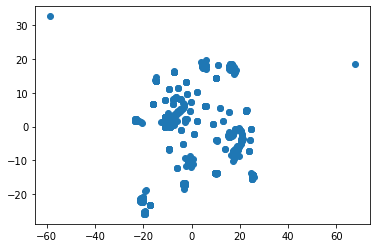

In [14]:
import matplotlib.pyplot as plt
# Visualize the clusters
plt.scatter(df_tsne['x'], df_tsne['y'])
plt.show()

C:\Users\sandy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


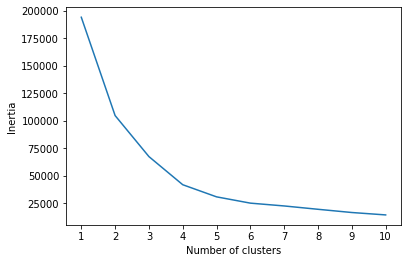

In [15]:
#Cluster Analysis with k-Means
from sklearn.cluster import KMeans

inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_tsne)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
# Initializing model with K = 4 (since we already know there are four classes of cryptocurrencies)
model = KMeans(n_clusters=4, random_state=5)

In [17]:
# Fitting model
model.fit(df_tsne)

# Get predictions
predictions = model.predict(df_tsne)
print(predictions)

[1 1 1 0 3 3 2 3 3 3 3 3 0 0 3 1 2 3 1 1 3 3 0 3 3 1 1 1 3 1 3 1 3 2 3 1 3
 0 3 3 3 3 0 3 3 2 3 3 3 1 2 3 2 0 3 3 3 1 3 3 0 3 0 0 1 3 0 3 1 2 1 1 1 3
 3 3 2 2 0 3 0 1 2 0 0 0 2 1 1 3 3 3 3 2 3 0 1 1 3 3 3 0 3 0 1 3 0 3 1 3 0
 3 1 1 3 3 2 3 2 3 1 3 3 3 0 3 2 1 2 3 0 1 2 2 3 3 0 3 1 3 0 1 2 0 1 3 3 0
 2 3 0 0 1 1 0 2 3 3 3 2 0 0 3 0 3 2 2 0 0 1 2 3 0 1 1 1 1 2 2 3 2 1 3 0 0
 2 1 3 1 3 0 0 3 3 1 0 1 2 3 0 1 1 0 1 3 3 0 2 3 2 1 2 0 1 1 2 0 2 0 1 2 1
 1 2 3 1 0 1 1 1 2 3 3 3 1 0 2 1 2 1 3 0 3 3 1 2 3 1 3 3 0 3 2 1 2 3 0 2 1
 0 2 1 1 1 0 2 3 0 0 0 1 1 0 3 0 3 1 3 3 3 3 1 2 1 1 3 1 3 2 2 1 3 1 3 3 1
 0 2 1 0 2 0 3 3 0 3 3 3 3 3 1 1 3 3 0 2 3 2 2 1 2 3 3 1 0 1 1 3 1 1 3 0 1
 0 2 2 3 2 2 0 1 1 3 1 3 3 3 1 1 2 3 1 1 3 2 1 2 2 1 2 3 1 1 2 2 0 2 0 3 3
 3 3 1 3 3 3 3 1 3 3 3 3 2 2 3 2 1 0 0 3 3 3 3 1 1 1 3 0 3 0 0 1 0 2 1 0 3
 3 1 1 3 2 3 0 3 3 3 3 1 0 3 1 3 1 1 3 1 0 0 3 3 2 3 1 1 0 3 1 3 1 3 3 1 3
 2 2 0 0 0 1 2 2 1 3 3 3 3 1 3 0 1 2 3 1 3 3 3 3 3 1 3 1 3 1 1 2 2 1 1 1 2
 0 1 0 2 0 1 3 2 2 1 3 1 

In [18]:
# add predictions back to the tsne dataframe for plotting
df_tsne['class']=predictions

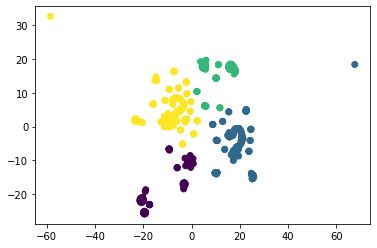

In [19]:
# Visualize the clusters
plt.scatter(x=df_tsne['x'], y=df_tsne['y'], c=df_tsne['class'])

plt.show()

In [20]:
#add class back to the original dataframe with currencies
df_crypto_orig['class']=predictions
df_crypto_orig.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,class
42,Scrypt,PoW/PoS,4.199995e+01,42,1
404,Scrypt,PoW/PoS,1.055185e+09,532000000,1
1337,X13,PoW/PoS,2.927942e+10,314159265359,1
BTC,SHA-256,PoW,1.792718e+07,21000000,0
ETH,Ethash,PoW,1.076842e+08,0,3
